## Ребров. Домашка 4

### Задание 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [7]:
boston = load_boston()
data = boston['data']

c:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:

In [8]:
feature_names = boston['feature_names']
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
target = boston['target']
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

c:\python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


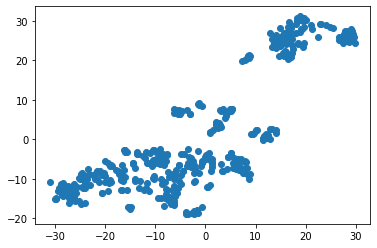

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

In [18]:
from sklearn.cluster import KMeans

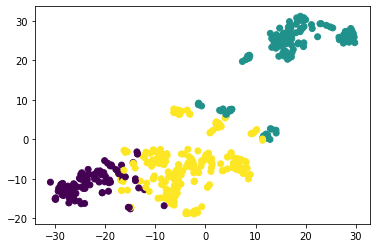

In [22]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [32]:
print('Средние значения Price:')
print(f'Кластер 1:\n{y_train[labels_train == 0].mean()}')
print(f'Кластер 2:\n{y_train[labels_train == 1].mean()}')
print(f'Кластер 3:\n{y_train[labels_train == 2].mean()}')

Средние значения Price:
Кластер 1:
price    27.788372
dtype: float64
Кластер 2:
price    16.165354
dtype: float64
Кластер 3:
price    24.958115
dtype: float64


In [33]:
print('Средние значения CRIM:')
print(f'Кластер 1:\n{X_train["CRIM"][labels_train == 0].mean()}')
print(f'Кластер 2:\n{X_train["CRIM"][labels_train == 1].mean()}')
print(f'Кластер 3:\n{X_train["CRIM"][labels_train == 2].mean()}')

Средние значения CRIM:
Кластер 1:
0.07356558139534884
Кластер 2:
10.797028425196851
Кластер 3:
0.4216602094240837


### Задание 3

c:\python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


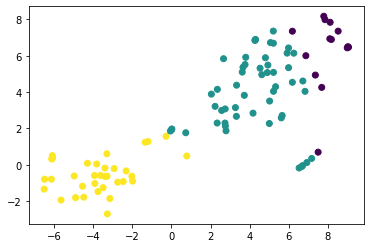

In [38]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = model.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [39]:
print('Средние значения CRIM:')
print(f'Кластер 1:\n{X_test["CRIM"][labels_test == 0].mean()}')
print(f'Кластер 2:\n{X_test["CRIM"][labels_test == 1].mean()}')
print(f'Кластер 3:\n{X_test["CRIM"][labels_test == 2].mean()}')

Средние значения CRIM:
Кластер 1:
0.08618571428571427
Кластер 2:
0.25200716981132076
Кластер 3:
10.165531142857143
